#   Individual Game Shots: Red Wings 2022 Season

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

all_games=pd.read_csv('Shots_Cleaned.csv')

game_id=[2022020022, 2022020028, 2022020044, 2022020072, 2022020088, 2022020102, 2022020111, 2022020132, 2022020144, 
         2022020164, 2022020181, 2022020190, 2022020203, 2022020217, 2022020237, 2022020255, 2022020272, 2022020279, 
         2022020311, 2022020325, 2022020348, 2022020361, 2022020386, 2022020394, 2022020405, 2022020419, 2022020435, 
         2022020460, 2022020467, 2022020485, 2022020503, 2022020519, 2022020560, 2022020563, 2022020584]

In [3]:
## Grouping data by game id
grouped = all_games.groupby(['Game_Id'])

In [4]:
## Creating seperate dataframes for each game id
g2022020022 = grouped.get_group(2022020022)
g2022020028 = grouped.get_group(2022020028)
g2022020044 = grouped.get_group(2022020044)
g2022020072 = grouped.get_group(2022020072)
g2022020088 = grouped.get_group(2022020088)
g2022020102 = grouped.get_group(2022020102)
g2022020111 = grouped.get_group(2022020111)
g2022020132 = grouped.get_group(2022020132)
g2022020144 = grouped.get_group(2022020144)
g2022020164 = grouped.get_group(2022020164)
g2022020181 = grouped.get_group(2022020181)
g2022020190 = grouped.get_group(2022020190)
g2022020203 = grouped.get_group(2022020203)
g2022020217 = grouped.get_group(2022020217)
g2022020237 = grouped.get_group(2022020237)
g2022020255 = grouped.get_group(2022020255)
g2022020272 = grouped.get_group(2022020272)
g2022020279 = grouped.get_group(2022020279)
g2022020311 = grouped.get_group(2022020311)
g2022020325 = grouped.get_group(2022020325)
g2022020348 = grouped.get_group(2022020348)
g2022020361 = grouped.get_group(2022020361)
g2022020386 = grouped.get_group(2022020386)
g2022020394 = grouped.get_group(2022020394)
g2022020405 = grouped.get_group(2022020405)
g2022020419 = grouped.get_group(2022020419)
g2022020435 = grouped.get_group(2022020435)
g2022020460 = grouped.get_group(2022020460)
g2022020467 = grouped.get_group(2022020467)
g2022020485 = grouped.get_group(2022020485)
g2022020503 = grouped.get_group(2022020503)
g2022020519 = grouped.get_group(2022020519)
g2022020560 = grouped.get_group(2022020560)
g2022020563 = grouped.get_group(2022020563)
g2022020584 = grouped.get_group(2022020584)

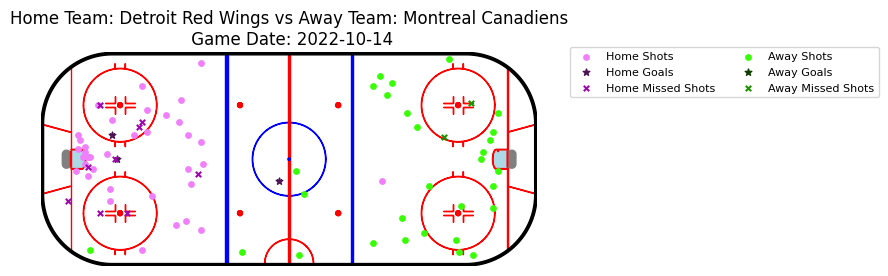

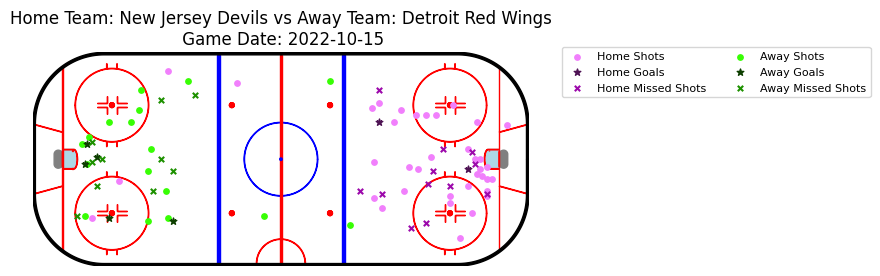

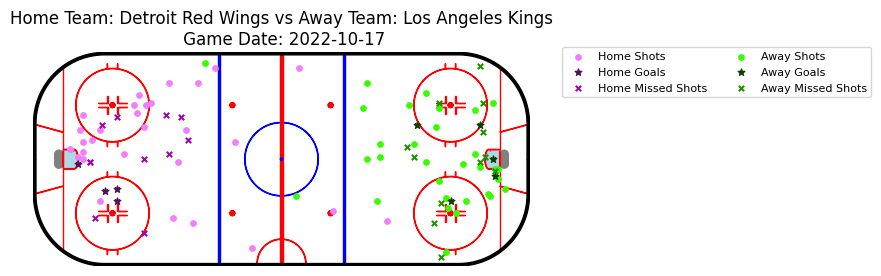

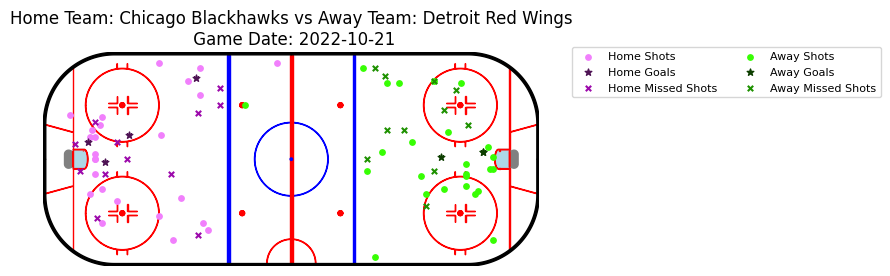

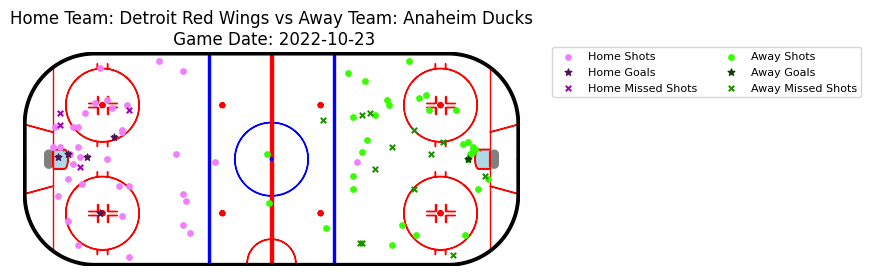

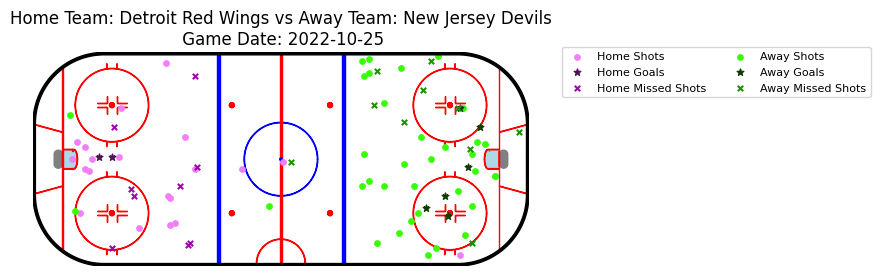

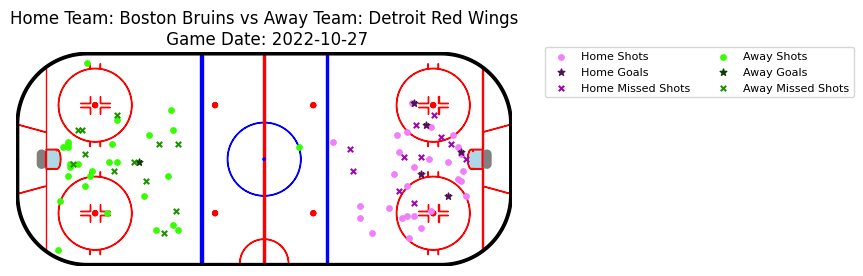

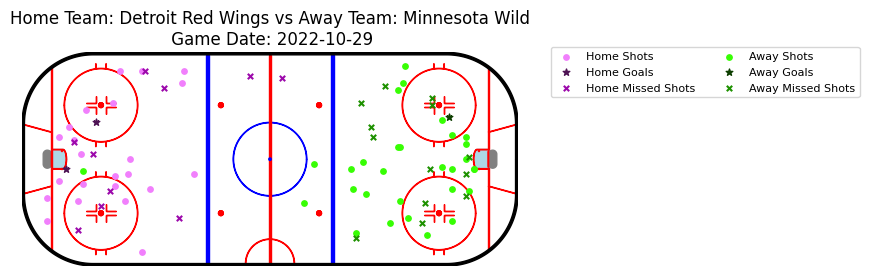

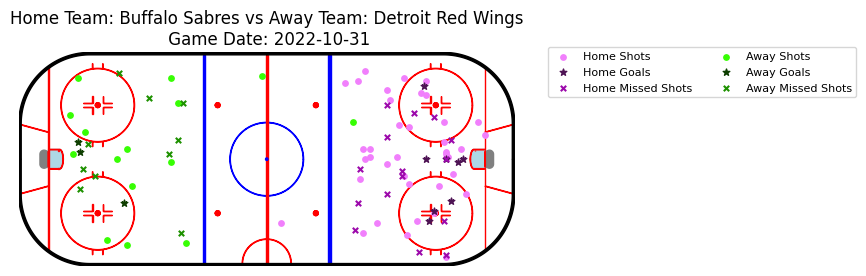

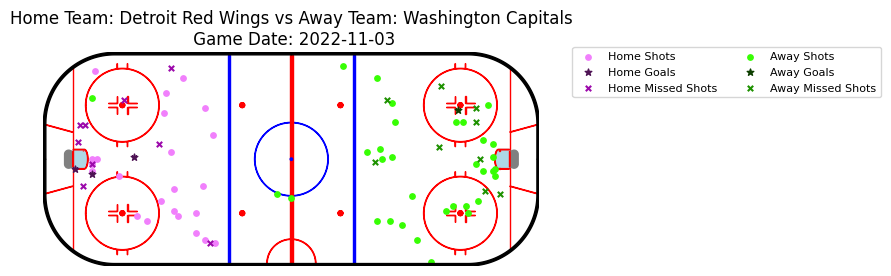

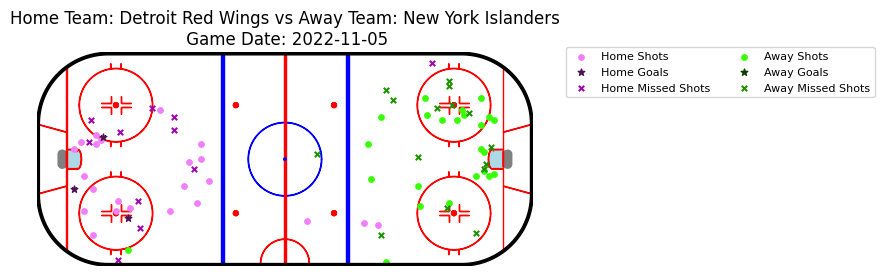

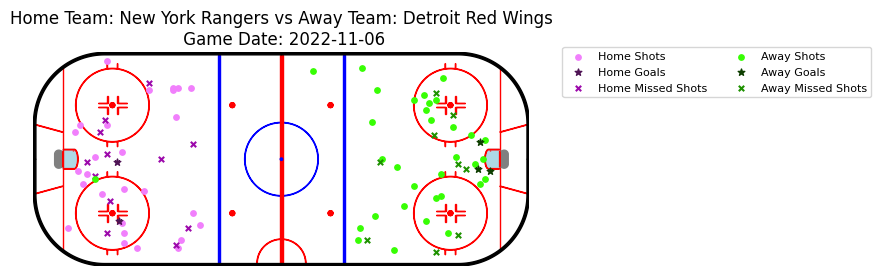

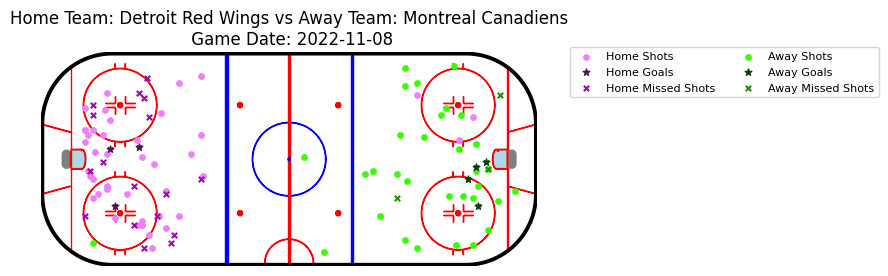

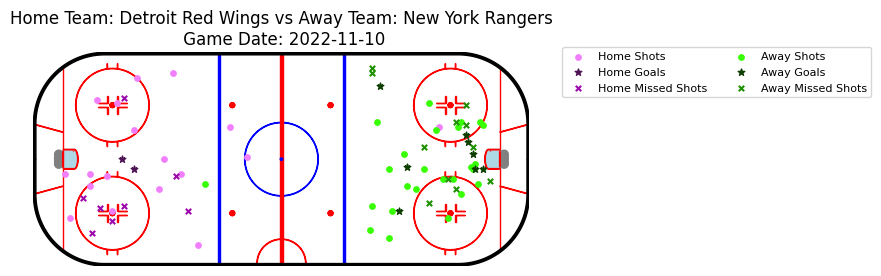

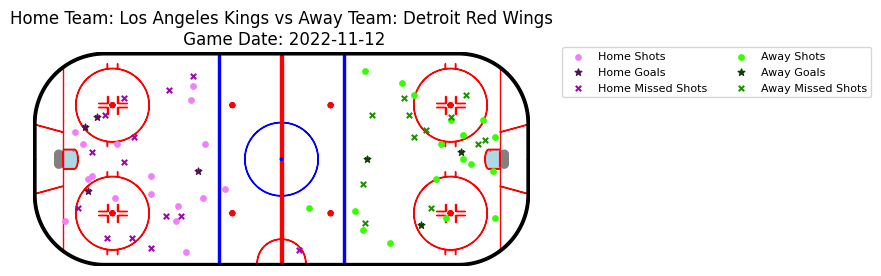

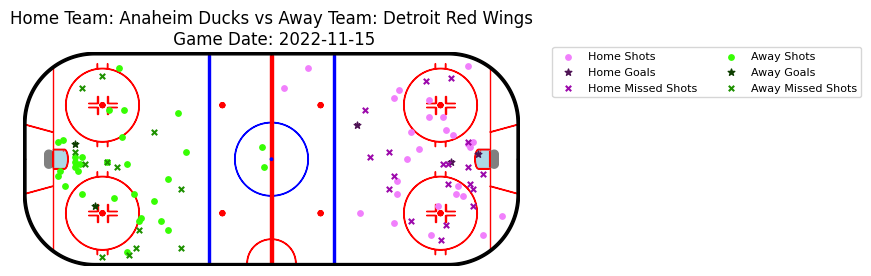

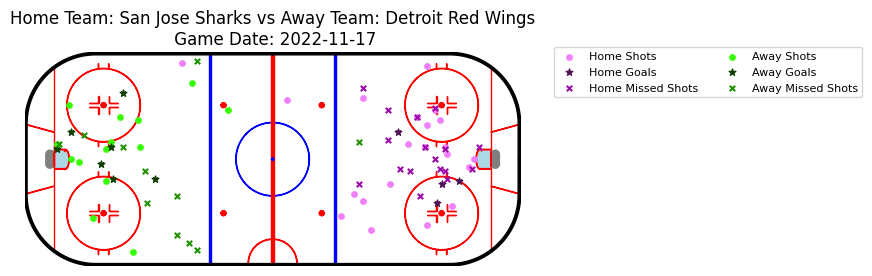

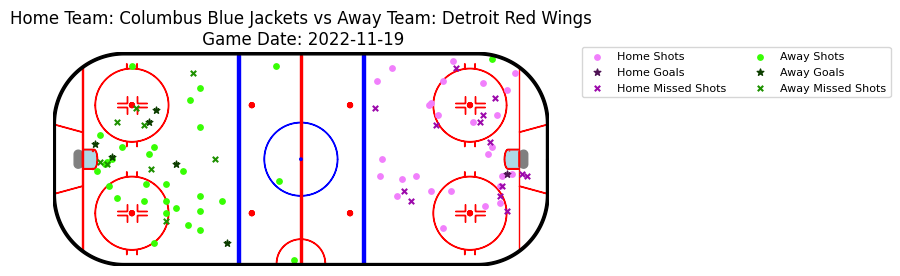

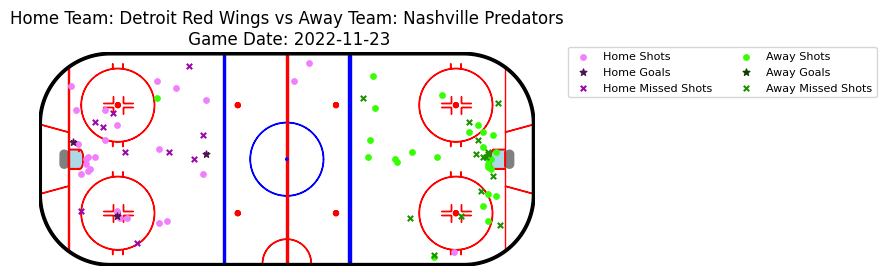

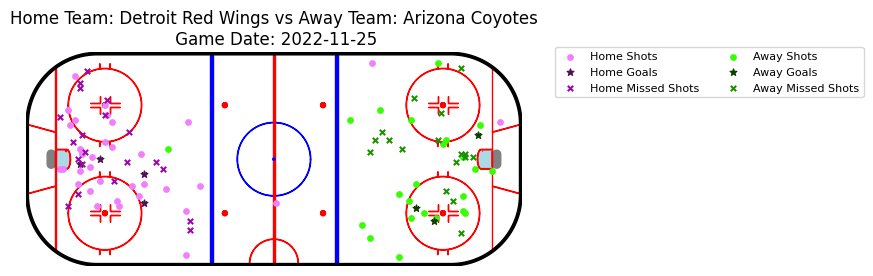

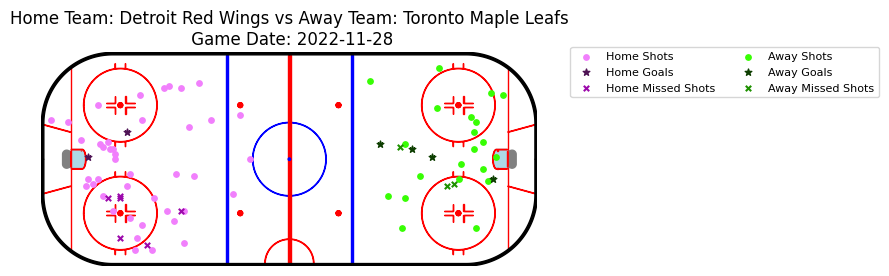

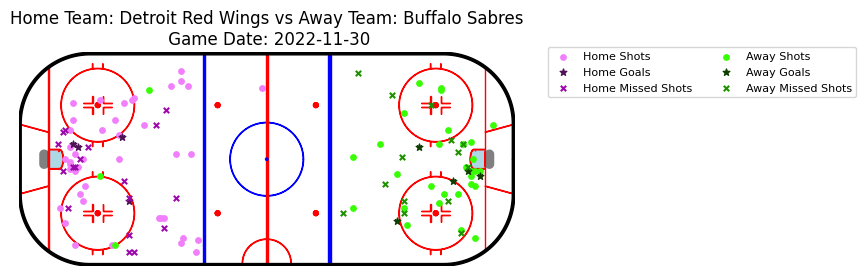

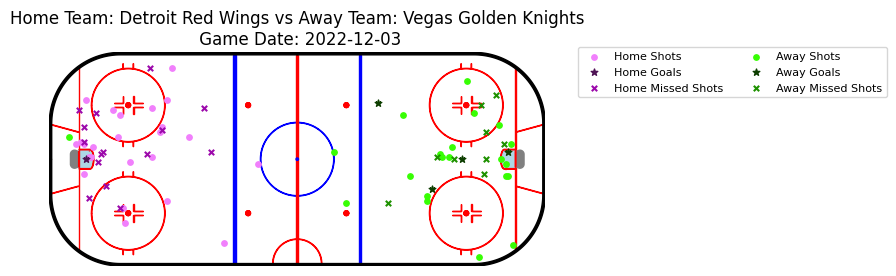

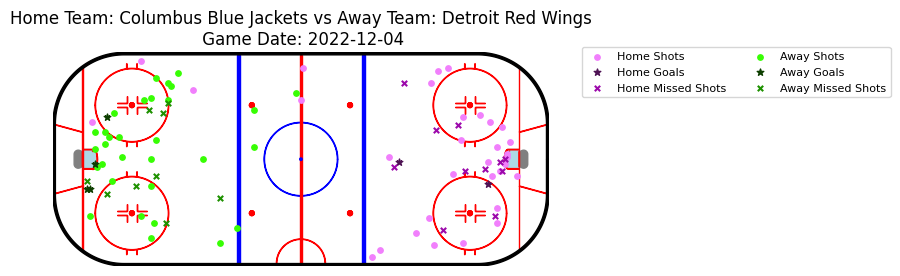

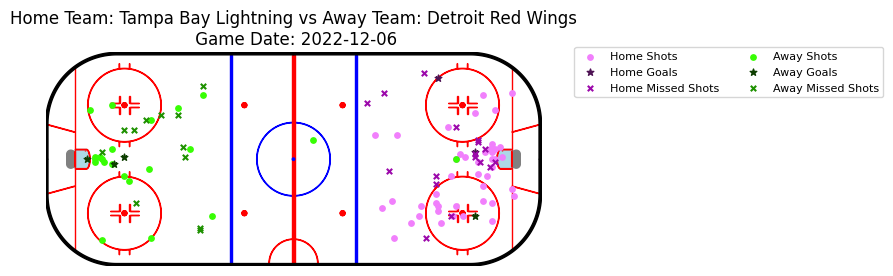

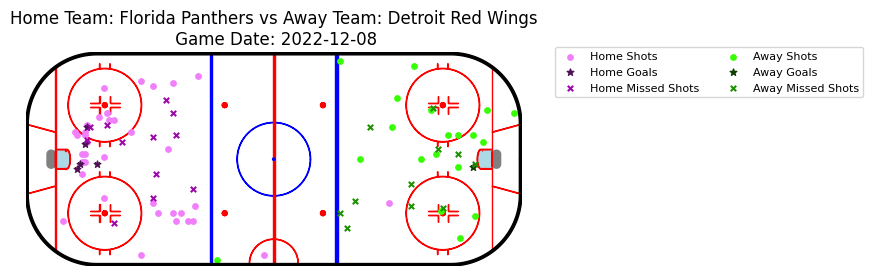

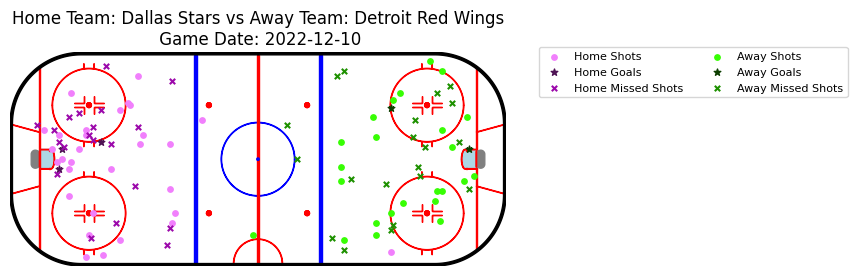

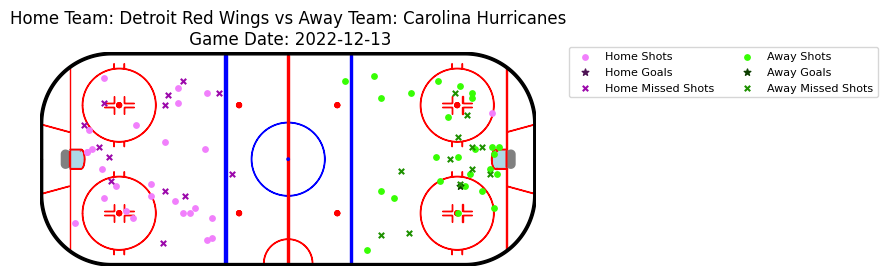

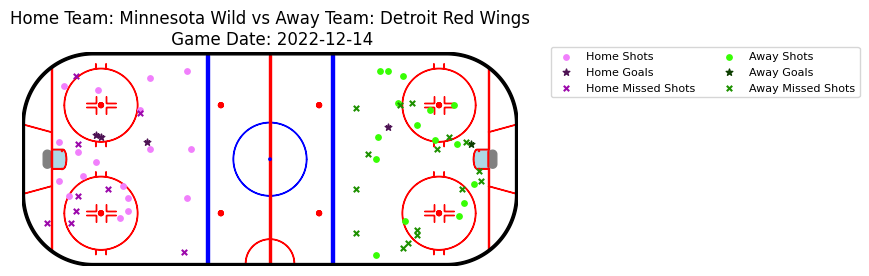

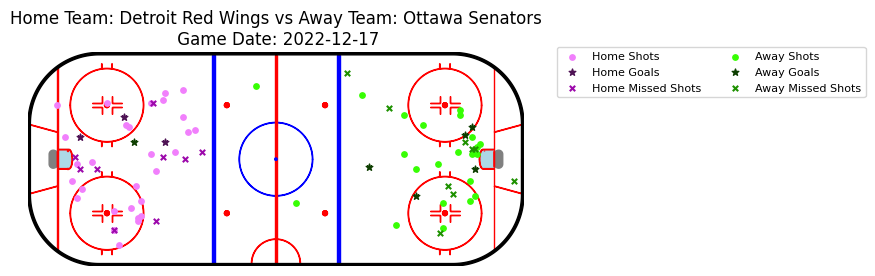

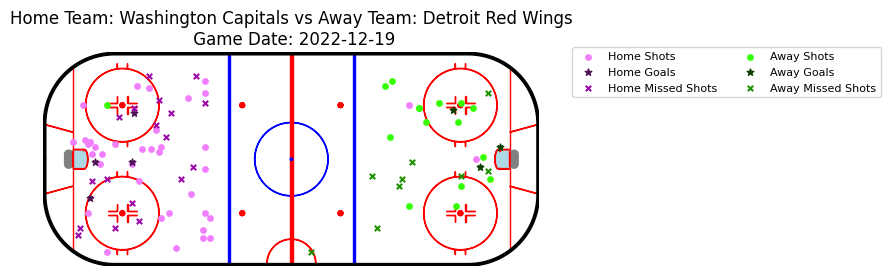

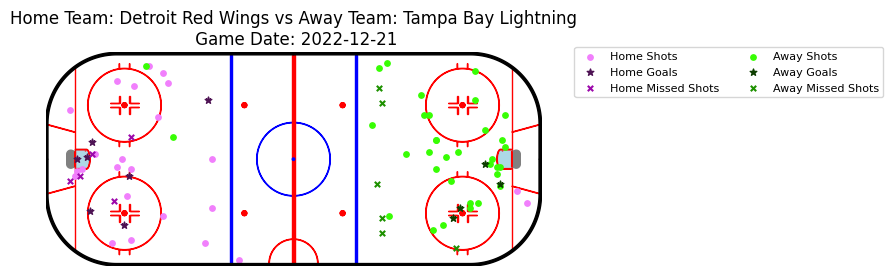

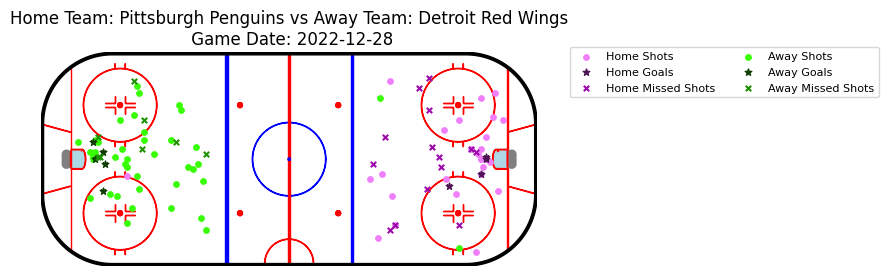

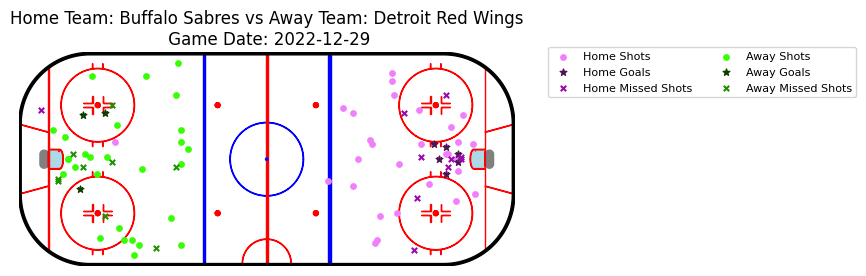

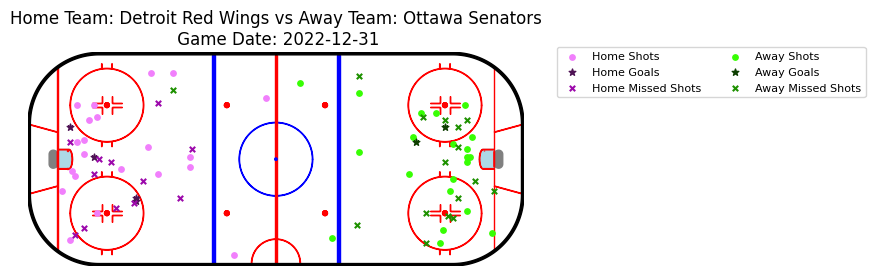

In [6]:
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 800em; }</style>"))

frames=[g2022020022,g2022020028,g2022020044,g2022020072,g2022020088,g2022020102,g2022020111,g2022020132,g2022020144,
        g2022020164,g2022020181,g2022020190,g2022020203,g2022020217,g2022020237,g2022020255,g2022020272,g2022020279,
        g2022020311,g2022020325,g2022020348,g2022020361,g2022020386,g2022020394,g2022020405,g2022020419,g2022020435,
        g2022020460,g2022020467,g2022020485,g2022020503,g2022020519,g2022020560,g2022020563,g2022020584]

for i in frames: 
    Away_team=i.loc[i['Team_Type'] == 'Away', 'Team_Name'].iloc[0]
    Home_team=i.loc[i['Team_Type'] == 'Home', 'Team_Name'].iloc[0]
    Date= i['Date'].iloc[0]

    Home_shots = i[i.Team_Type == "Home"]
    Away_shots = i[i.Team_Type == "Away"]
    
    ## Flipping data coordinates to one side of rink 
    period_2h=Home_shots['Period'] == 2
    Home_shots.loc[period_2h, ['X']] = Home_shots['X'] * -1
    Home_shots.loc[period_2h, ['Y']] = Home_shots['Y'] * -1
    
    period_4h=Home_shots['Period'] == 4
    Home_shots.loc[period_4h, ['X']] = Home_shots['X'] * -1
    Home_shots.loc[period_4h, ['Y']] = Home_shots['Y'] * -1

    period_2a=Away_shots['Period'] == 2
    Away_shots.loc[period_2a, ['X']] = Away_shots['X'] * -1
    Away_shots.loc[period_2a, ['Y']] = Away_shots['Y'] * -1
    
    period_4a=Away_shots['Period'] == 4
    Away_shots.loc[period_4a, ['X']] = Away_shots['X'] * -1
    Away_shots.loc[period_4a, ['Y']] = Away_shots['Y'] * -1
  
    ## Dataframe for each type of shot seperated by team type 
    h_shot=Home_shots[Home_shots.Event == "Shot"]
    h_goal=Home_shots[Home_shots.Event=="Goal"]
    h_miss=Home_shots[Home_shots.Event=="Missed Shot"]

    a_shot=Away_shots[Away_shots.Event == "Shot"]
    a_goal=Away_shots[Away_shots.Event=="Goal"]
    a_miss=Away_shots[Away_shots.Event=="Missed Shot"]

    from hockey_rink import NHLRink
    rink=NHLRink()
    ax = rink.draw()
  
    a= rink.scatter(h_shot["X"], h_shot["Y"], color='#F17FFC',marker='o',s=15)
    b= rink.scatter(h_goal["X"], h_goal["Y"], color='#4E1354',marker='*',s=25)
    c= rink.scatter(h_miss["X"], h_miss["Y"], color='#9C09AB',marker='x',s=15)

    d= rink.scatter(a_shot["X"], a_shot["Y"], color='#37FE03',marker='o',s=15)
    e= rink.scatter(a_goal["X"], a_goal["Y"], color='#0D3E00',marker='*',s=25)
    f= rink.scatter(a_miss["X"], a_miss["Y"], color='#1E9100',marker='x',s=15)
  
    
    plt.title('Home Team: '+Home_team+' vs Away Team: '+Away_team+'\n Game Date: '+ Date)
    plt.legend((a, b, c, d, e, f),
           ('Home Shots', 'Home Goals', 'Home Missed Shots', 'Away Shots', 'Away Goals', 'Away Missed Shots'),
           scatterpoints=1,
           loc='upper right',
           bbox_to_anchor=(1.7, 1.05),
           ncol=2,
           fontsize=8)
    plt.show()